In [1]:
import pandas as pd

X_train_resampled = pd.read_csv('../data/X_train_resampled.csv')
X_val = pd.read_csv('../data/X_val.csv')

Y_train_resampled = pd.read_csv('../data/Y_train_resampled.csv')
Y_val = pd.read_csv('../data/Y_val.csv')

Y_train_resampled = Y_train_resampled.squeeze()
Y_val = Y_val.squeeze()

In [5]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import roc_auc_score as ras

models = [LogisticRegression(class_weight='balanced'), XGBClassifier(), SVC(kernel='rbf', probability=True)] 
for model in models:
    model.fit(X_train_resampled, Y_train_resampled)
    print(f'{model} : ')

    train_preds = model.predict(X_train_resampled)
    print('Training Accuracy : ', ras(Y_train_resampled, train_preds))

    val_preds = model.predict(X_val)
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()

LogisticRegression(class_weight='balanced') : 
Training Accuracy :  0.7615894039735099
Validation Accuracy :  0.6862934362934363

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7586872586872586

SVC(probability=True) : 
Training Accu

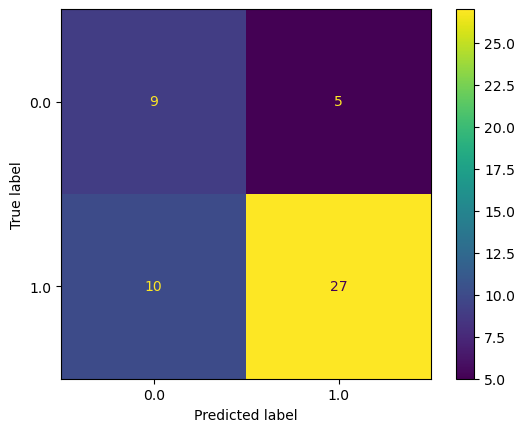

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, models[1].predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.80      0.57      0.67        14
         1.0       0.85      0.95      0.90        37

    accuracy                           0.84        51
   macro avg       0.83      0.76      0.78        51
weighted avg       0.84      0.84      0.83        51

